# WORLD BANK API PROJECT

## Question: What is the distribution of labor force and unemployment rate for population with advanced education across EU (European Union) , LCN (Latin & Caribbean) and ARB (Arab Countries) regions?

In [ ]:
#pip install world_bank_data --upgrade
#pip install wbgapi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import scipy.stats as stats

%matplotlib inline


pd.set_option('display.max_rows', 200)



In [3]:
wb.topic.info() # to find the topic number of 'education'

id,value
1,Agriculture & Rural Development
2,Aid Effectiveness
3,Economy & Growth
4,Education
5,Energy & Mining
6,Environment
7,Financial Sector
8,Health
9,Infrastructure
10,Social Protection & Labor


In [4]:
wb.series.info(topic= 4) # to look at the data series re topic 4

id,value
SE.PRM.TENR,"Adjusted net enrollment rate, primary (% of primary school age children)"
SE.PRM.TENR.FE,"Adjusted net enrollment rate, primary, female (% of primary school age children)"
SE.PRM.TENR.MA,"Adjusted net enrollment rate, primary, male (% of primary school age children)"
SE.SEC.UNER.LO.FE.ZS,"Adolescents out of school, female (% of female lower secondary school age)"
SE.PRM.UNER.ZS,Children out of school (% of primary school age)
SE.PRM.UNER.MA.ZS,"Children out of school, male (% of male primary school age)"
SE.PRM.UNER.FE,"Children out of school, primary, female"
SE.XPD.CSEC.ZS,"Current education expenditure, secondary (% of total expenditure in secondary public institutions)"
SE.XPD.CTER.ZS,"Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)"
SE.TER.CUAT.BA.ZS,"Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"


I will use these series:

- SE.XPD.CTER.ZS Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)
- SE.XPD.CTOT.ZS Current education expenditure, total (% of total expenditure in public institutions)
- SE.XPD.TERT.ZS Expenditure on tertiary education (% of government expenditure on education)
- SE.XPD.TOTL.GB.ZS Government expenditure on education, total (% of government expenditure)
- SE.XPD.TOTL.GD.ZS Government expenditure on education, total (% of GDP)


- SE.TER.CUAT.ST.ZS Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)
- SE.TER.CUAT.ST.MA.ZS Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)
- SE.TER.CUAT.ST.FE.ZS Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)


- SE.SEC.CUAT.PO.FE.ZS Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)
- SE.SEC.CUAT.PO.ZS Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)


- SE.TER.CUAT.BA.FE.ZS Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)
- SE.TER.CUAT.BA.MA.ZS Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)
- SE.TER.CUAT.BA.ZS Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)

- SE.COM.DURS Compulsory education, duration (years)

In [5]:
wb.series.info(q='education') 
# q for query, and gives some other data series that didn't come up in the query conducted with topic=4

id,value
FX.OWN.TOTL.PL.ZS,"Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)"
FX.OWN.TOTL.SO.ZS,"Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+)"
NY.ADJ.AEDU.CD,Adjusted savings: education expenditure (current US$)
NY.ADJ.AEDU.GN.ZS,Adjusted savings: education expenditure (% of GNI)
SE.COM.DURS,"Compulsory education, duration (years)"
SE.PRE.DURS,"Preprimary education, duration (years)"
SE.PRE.TCAQ.FE.ZS,"Trained teachers in preprimary education, female (% of female teachers)"
SE.PRE.TCAQ.MA.ZS,"Trained teachers in preprimary education, male (% of male teachers)"
SE.PRE.TCAQ.ZS,Trained teachers in preprimary education (% of total teachers)
SE.PRM.CUAT.FE.ZS,"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)"


- SL.TLF.ADVN.FE.ZS	Labor force with advanced education, female (% of female working-age population with advanced education)
- SL.TLF.ADVN.MA.ZS	Labor force with advanced education, male (% of male working-age population with advanced education)
- SL.TLF.ADVN.ZS	Labor force with advanced education (% of total working-age population with advanced education)


- SL.UEM.ADVN.FE.ZS	Unemployment with advanced education, female (% of female labor force with advanced education)
- SL.UEM.ADVN.MA.ZS	Unemployment with advanced education, male (% of male labor force with advanced education)
- SL.UEM.ADVN.ZS	Unemployment with advanced education (% of total labor force with advanced education)


- SL.UEM.INTM.FE.ZS	Unemployment with intermediate education, female (% of female labor force with intermediate education)
- SL.UEM.INTM.MA.ZS	Unemployment with intermediate education, male (% of male labor force with intermediate education)
- SL.UEM.INTM.ZS	Unemployment with intermediate education (% of total labor force with intermediate education)

In [6]:
# details about a data series
wb.series.metadata.get('SL.UEM.INTM.ZS') 

Field,Value
Aggregationmethod,Weighted Average
IndicatorName,Unemployment with intermediate education (% of total labor force with intermediate education)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,The percentage of the labor force with an intermediate level of education who are unemployed. Intermediate education comprises upper secondary or post-secondary non tertiary education according to the International Standard Classification of Education 2011 (ISCED 2011).
Periodicity,Annual
Source,"International Labour Organization, ILOSTAT database. Data retrieved on February 8, 2022."
Topic,Social Protection & Labor: Unemployment


In [7]:
# to fetch regional codes
wb.region.info()

code,name
AFE,Africa Eastern and Southern
AFR,Africa
AFW,Africa Western and Central
ARB,Arab World
CAA,Sub-Saharan Africa (IFC classification)
CEA,East Asia and the Pacific (IFC classification)
CEB,Central Europe and the Baltics
CEU,Europe and Central Asia (IFC classification)
CLA,Latin America and the Caribbean (IFC classification)
CME,Middle East and North Africa (IFC classification)



- I will create a dataframe for EU, LCN and ARB regions for the year 2020

- I will use data series that are about labor force with advanced education and unemployment with advanced and intermediate education.

In [8]:
# EU countries
euu_df = wb.data.DataFrame (['SL.TLF.ADVN.ZS', 
                         'SL.UEM.ADVN.ZS', 
                         'SE.TER.CUAT.BA.ZS', 
                         'SL.UEM.INTM.ZS'], wb.region.members ('EUU'), 
                            time = 2020, skipBlanks= True, labels=True)

# resetting the column names 
euu_df.columns = ['Country', 
              'Pop with BA', 
              'Labor Force with Adv Edu',
              'Unemployment with Adv Edu', 
              'Unemployment with Int Edu'] 

# resetting the index
euu_df.reset_index (drop= True, inplace = True)
euu_df


,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
0,Finland,NaN,73.730003,4.32,8.91
1,Luxembourg,NaN,79.489998,4.65,6.88
2,Lithuania,38.103458,82.500000,4.09,11.36
3,Bulgaria,26.053471,75.080002,2.46,4.71
4,Croatia,NaN,71.370003,5.36,8.20
5,Estonia,30.846510,82.160004,4.77,7.39
6,Spain,23.578011,78.529999,10.22,16.50
7,Malta,21.841009,86.459999,2.85,3.68
8,Italy,16.545980,73.400002,5.33,8.74
9,Netherlands,34.773628,80.360001,2.58,3.68


In [9]:
# to get the mean 
euu_df.mean ()

/var/folders/_k/l8cjrd3s28xg5ssbhjb___tw0000gn/T/ipykernel_12692/2525724112.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  euu_df.mean ()


Pop with BA                  27.328787
Labor Force with Adv Edu     78.195186
Unemployment with Adv Edu     4.397037
Unemployment with Int Edu     7.102593
dtype: float64

In [10]:
# find maximum values of a list of columns

maxValues = euu_df[['Pop with BA', 'Labor Force with Adv Edu', 'Unemployment with Adv Edu', 'Unemployment with Int Edu']].max()

print(maxValues)

Pop with BA                  38.103458
Labor Force with Adv Edu     86.459999
Unemployment with Adv Edu    12.070000
Unemployment with Int Edu    18.520000
dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

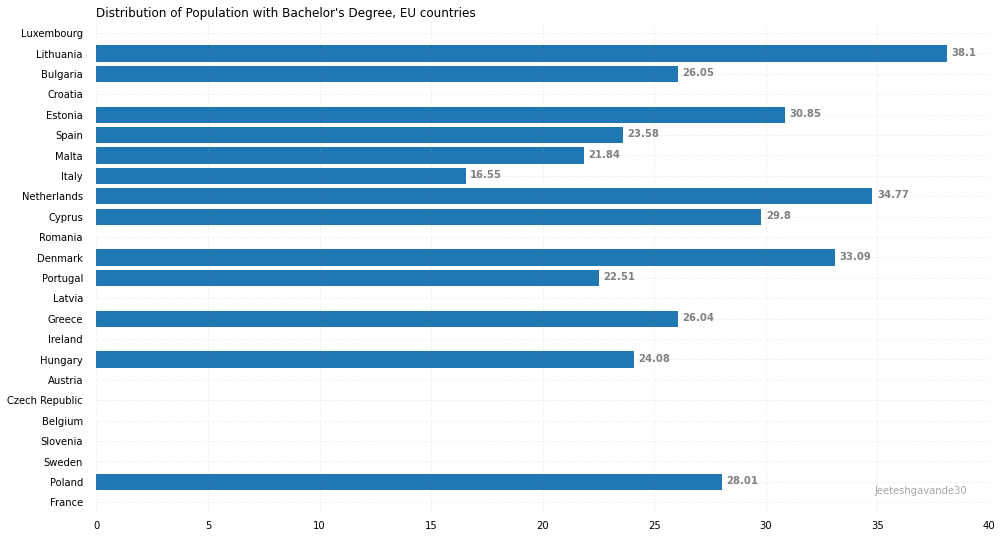

In [43]:
country = euu_df['Country'].head(30)
percentage = euu_df['Pop with BA'].head(30)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(country, percentage)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')


# Add Plot Title
ax.set_title("Distribution of Population with Bachelor's Degree, EU countries",
             loc ='left', )
 
# Add Text watermark
fig.text(0.8, 0.15, 'Jeeteshgavande30', fontsize = 10,
         color ='grey', ha ='left', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [13]:
# Latin & Caribbean countries
lcn_df = wb.data.DataFrame (['SL.TLF.ADVN.ZS', 
                         'SL.UEM.ADVN.ZS', 
                         'SE.TER.CUAT.BA.ZS', 
                         'SL.UEM.INTM.ZS'], wb.region.members ('LCN'), 
                            time = 2020, skipBlanks= True, labels=True)

# resetting the column names 
lcn_df.columns = ['Country', 
              'Pop with BA', 
              'Labor Force with Adv Edu',
              'Unemployment with Adv Edu', 
              'Unemployment with Int Edu'] 

# resetting the index
lcn_df.reset_index (drop= True, inplace = True)

lcn_df

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
0,Jamaica,NaN,77.279999,4.18,6.380000
1,Mexico,17.128469,73.430000,4.71,5.280000
2,El Salvador,NaN,80.300003,5.75,8.130000
3,Costa Rica,21.605690,76.930000,9.17,21.600000
4,Curacao,30.166950,77.610001,10.58,22.530001
5,Chile,NaN,80.230003,9.38,11.990000
6,Brazil,NaN,78.330002,7.58,16.080000
7,Dominican Republic,NaN,80.080002,5.55,8.500000
8,Bolivia,NaN,78.410004,13.03,10.700000
9,Argentina,NaN,77.239998,4.72,12.570000


In [14]:
# to get the mean 
lcn_df.mean ()

/var/folders/_k/l8cjrd3s28xg5ssbhjb___tw0000gn/T/ipykernel_12692/1592915792.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lcn_df.mean ()


Pop with BA                  16.536797
Labor Force with Adv Edu     77.882501
Unemployment with Adv Edu     8.110000
Unemployment with Int Edu    13.131667
dtype: float64

In [15]:
maxValues = lcn_df[['Pop with BA', 'Labor Force with Adv Edu', 'Unemployment with Adv Edu', 'Unemployment with Int Edu']].max()

print(maxValues)

Pop with BA                  30.166950
Labor Force with Adv Edu     80.540001
Unemployment with Adv Edu    13.230000
Unemployment with Int Edu    23.910000
dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


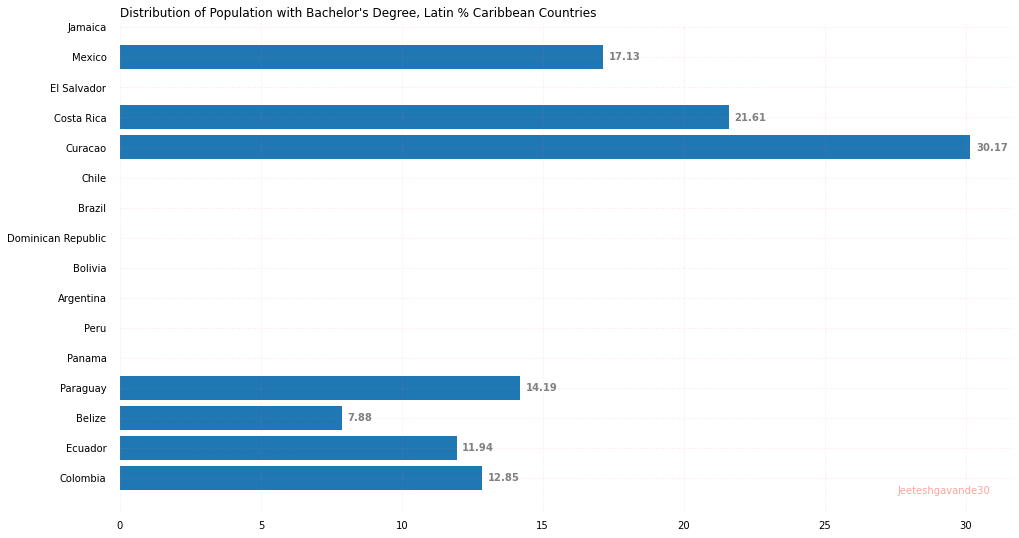

In [16]:
country = lcn_df['Country'].head(30)
percentage = lcn_df['Pop with BA'].head(30)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(country, percentage)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='salmon',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')


# Add Plot Title
ax.set_title("Distribution of Population with Bachelor's Degree, Latin % Caribbean Countries",
             loc ='left', )
 
# Add Text watermark
fig.text(0.8, 0.15, 'Jeeteshgavande30', fontsize = 10,
         color ='salmon', ha ='left', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [17]:
# Arab world countries
arb_df = wb.data.DataFrame (['SL.TLF.ADVN.ZS', 
                         'SL.UEM.ADVN.ZS', 
                         'SE.TER.CUAT.BA.ZS', 
                         'SL.UEM.INTM.ZS'], wb.region.members ('ARB'), 
                            time = 2020, skipBlanks= True, labels=True)

# resetting the column names 
arb_df.columns = ['Country', 
              'Pop with BA', 
              'Labor Force with Adv Edu',
              'Unemployment with Adv Edu', 
              'Unemployment with Int Edu'] 

# resetting the index
arb_df.reset_index (drop= True, inplace = True)
arb_df

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
0,Saudi Arabia,31.051500,75.430000,11.540000,5.87
1,Qatar,NaN,88.019997,0.300000,0.20
2,Jordan,22.685850,59.040001,27.350000,10.61
3,West Bank and Gaza,21.708691,68.900002,29.379999,25.09
4,"Egypt, Arab Rep.",NaN,62.820000,14.500000,7.17
5,Oman,17.096630,NaN,NaN,NaN
6,Bahrain,23.333759,NaN,NaN,NaN


In [18]:
# to get the mean 
arb_df.mean ()

/var/folders/_k/l8cjrd3s28xg5ssbhjb___tw0000gn/T/ipykernel_12692/3386923280.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  arb_df.mean ()


Pop with BA                  23.175286
Labor Force with Adv Edu     70.842000
Unemployment with Adv Edu    16.614000
Unemployment with Int Edu     9.788000
dtype: float64

In [19]:
maxValues = arb_df[['Pop with BA', 'Labor Force with Adv Edu', 'Unemployment with Adv Edu', 'Unemployment with Int Edu']].max()

print(maxValues)

Pop with BA                  31.051500
Labor Force with Adv Edu     88.019997
Unemployment with Adv Edu    29.379999
Unemployment with Int Edu    25.090000
dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


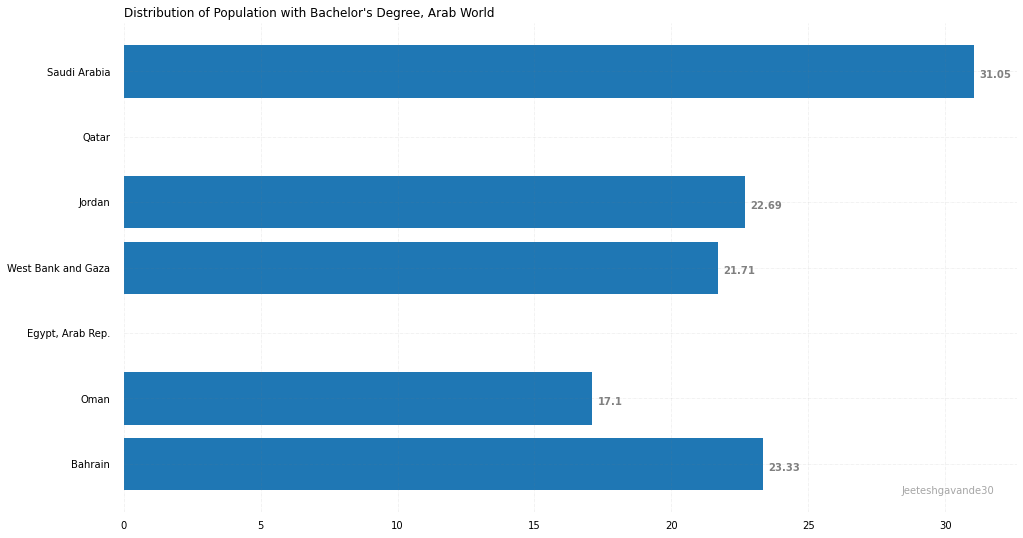

In [21]:
country = arb_df['Country'].head(30)
percentage = arb_df['Pop with BA'].head(30)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(country, percentage)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')


# Add Plot Title
ax.set_title("Distribution of Population with Bachelor's Degree, Arab World",
             loc ='left', )
 
# Add Text watermark
fig.text(0.8, 0.15, 'Jeeteshgavande30', fontsize = 10,
         color ='grey', ha ='left', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

 
 
Regardless of a specific region, I will check all countries for which the data is available. 

In [22]:
# for all countries the data is available

all_countries = wb.data.DataFrame (['SL.TLF.ADVN.ZS', 
                         'SL.UEM.ADVN.ZS', 
                         'SE.TER.CUAT.BA.ZS', 
                         'SL.UEM.INTM.ZS'], 
                            time = 2020, skipBlanks= True, labels=True)

# resetting the column names 
all_countries.columns = ['Country', 
              'Pop with BA', 
              'Labor Force with Adv Edu',
              'Unemployment with Adv Edu', 
              'Unemployment with Int Edu'] 

# resetting the index
all_countries.reset_index (drop= True, inplace = True)
all_countries

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
0,West Bank and Gaza,21.708691,68.900002,29.379999,25.090000
1,Vietnam,NaN,87.419998,4.490000,2.660000
2,Uzbekistan,NaN,72.690002,1.510000,6.220000
3,United States,37.524288,71.639999,5.590000,10.460000
4,Ukraine,NaN,66.550003,7.990000,10.730000
5,Turkey,NaN,74.879997,12.630000,14.960000
6,Thailand,NaN,81.570000,2.180000,1.390000
7,Switzerland,NaN,81.169998,3.510000,5.010000
8,Sweden,NaN,83.529999,4.730000,6.320000
9,Spain,23.578011,78.529999,10.220000,16.500000


In [23]:
all_countries.mean ()

/var/folders/_k/l8cjrd3s28xg5ssbhjb___tw0000gn/T/ipykernel_12692/4239001355.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_countries.mean ()


Pop with BA                  23.807908
Labor Force with Adv Edu     75.516035
Unemployment with Adv Edu     7.453529
Unemployment with Int Edu     9.748753
dtype: float64

In [24]:
maxValues = all_countries[['Pop with BA', 'Labor Force with Adv Edu', 'Unemployment with Adv Edu', 'Unemployment with Int Edu']].max()

print(maxValues)

Pop with BA                  38.103458
Labor Force with Adv Edu     90.599998
Unemployment with Adv Edu    29.379999
Unemployment with Int Edu    30.780001
dtype: float64


In [79]:
#sorting a column in descending order

pop_with_ba = all_countries.sort_values(by='Pop with BA',ascending=False)
pop_with_ba

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
37,Lithuania,38.103458,82.500000,4.090000,11.360000
3,United States,37.524288,71.639999,5.590000,10.460000
100,United Kingdom,37.276470,NaN,NaN,NaN
50,Iceland,36.618309,88.070000,3.670000,5.530000
109,Australia,35.023411,NaN,NaN,NaN
27,Netherlands,34.773628,80.360001,2.580000,3.680000
62,Denmark,33.090500,76.650002,4.680000,4.770000
29,Mongolia,32.604370,68.769997,5.300000,9.080000
26,New Zealand,32.283272,83.419998,2.930000,4.930000
15,Saudi Arabia,31.051500,75.430000,11.540000,5.870000


In [86]:
# SE.XPD.TERT.ZS Expenditure on tertiary education (% of government expenditure on education)
wb.data.DataFrame('SE.XPD.TERT.ZS', ['AUS' , 'LTU', 'ISL', 'GBR', 'DNK'], time=range(2000, 2020, 5))

,YR2000,YR2005,YR2010,YR2015
economy,,,,
AUS,23.41993,22.19504,22.27661,28.85535
DNK,30.00131,28.67793,27.32889,NaN
GBR,17.54055,22.29214,16.39469,22.82077
ISL,18.08919,19.12990,21.46367,18.88877
LTU,NaN,20.99424,23.56181,27.85941


<AxesSubplot:xlabel='economy'>

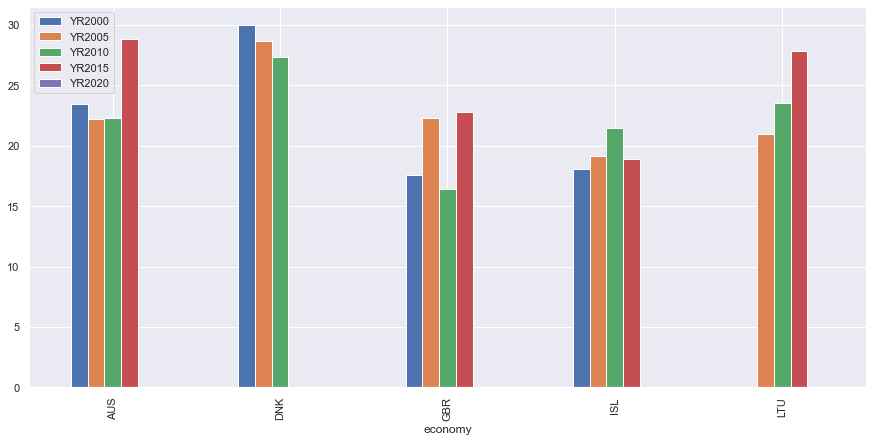

In [93]:
# SE.XPD.TERT.ZS Expenditure on tertiary education (% of government expenditure on education)
govt_exp= wb.data.DataFrame('SE.XPD.TERT.ZS', ['AUS' , 'LTU', 'ISL', 'GBR', 'DNK'], 
                            time=range(2000, 2022, 5)).plot.bar()
govt_exp

Lithuania shows a regular increasing trend while Denmark shows a decreasing trend in twenty years in government expenditure on tertiary education.



In [26]:
#sorting a column in descending order

labor_force = all_countries.sort_values(by='Labor Force with Adv Edu',ascending=False)
labor_force

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
32,Mauritius,NaN,90.599998,5.480000,9.820000
50,Iceland,36.618309,88.070000,3.670000,5.530000
19,Qatar,NaN,88.019997,0.300000,0.200000
1,Vietnam,NaN,87.419998,4.490000,2.660000
33,Malta,21.841009,86.459999,2.850000,3.680000
13,Seychelles,NaN,84.250000,4.420000,4.570000
38,Latvia,NaN,83.860001,5.080000,8.760000
24,Norway,NaN,83.730003,2.810000,4.360000
8,Sweden,NaN,83.529999,4.730000,6.320000
26,New Zealand,32.283272,83.419998,2.930000,4.930000


In [27]:
#sorting a column in descending order

unemployment_adv = all_countries.sort_values(by='Unemployment with Adv Edu',ascending=False)
unemployment_adv

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
0,West Bank and Gaza,21.708691,68.900002,29.379999,25.090000
41,Jordan,22.685850,59.040001,27.350000,10.610000
39,Kosovo,NaN,70.980003,19.830000,26.480000
16,Rwanda,NaN,77.269997,18.709999,24.000000
72,Botswana,NaN,77.389999,18.010000,30.780001
78,Armenia,24.209721,64.510002,17.240000,18.799999
49,India,NaN,61.160000,15.680000,8.950000
82,South Asia,NaN,61.091268,15.641987,9.055852
81,South Asia (IDA & IBRD),NaN,61.091268,15.641987,9.055852
55,Georgia,NaN,67.440002,14.760000,20.540001


In [28]:
#sorting a column in descending order

unemployment_int = all_countries.sort_values(by='Unemployment with Int Edu',ascending=False)
unemployment_int

,Country,Pop with BA,Labor Force with Adv Edu,Unemployment with Adv Edu,Unemployment with Int Edu
72,Botswana,NaN,77.389999,18.010000,30.780001
10,South Africa,NaN,78.070000,14.660000,30.200001
39,Kosovo,NaN,70.980003,19.830000,26.480000
0,West Bank and Gaza,21.708691,68.900002,29.379999,25.090000
16,Rwanda,NaN,77.269997,18.709999,24.000000
23,Panama,NaN,80.540001,13.230000,23.910000
65,Curacao,30.166950,77.610001,10.580000,22.530001
67,Costa Rica,21.605690,76.930000,9.170000,21.600000
55,Georgia,NaN,67.440002,14.760000,20.540001
78,Armenia,24.209721,64.510002,17.240000,18.799999


In [29]:
unemployment = wb.data.DataFrame (["SL.UEM.ADVN.FE.ZS",
                                  "SL.UEM.ADVN.MA.ZS",
                                  "SL.UEM.ADVN.ZS"], wb.region.members ('WLD'), skipBlanks=True, time = [2020], labels=True)


# resetting the column names 
unemployment.columns = ['Country', 
              'Female Unemployment with Adv Edu', 
              'Male Unemployment with Adv Edu',
              'Total Unemployment with Adv Edu'] 

# resetting the index
unemployment.reset_index (drop= True, inplace = True)
unemployment


,Country,Female Unemployment with Adv Edu,Male Unemployment with Adv Edu,Total Unemployment with Adv Edu
0,Rwanda,21.270000,16.940001,18.709999
1,Bulgaria,2.360000,2.600000,2.460000
2,Jordan,34.939999,22.129999,27.350000
3,Azerbaijan,6.380000,6.740000,6.560000
4,Moldova,1.070000,3.860000,2.310000
5,Denmark,4.860000,4.460000,4.680000
6,Brazil,8.600000,6.430000,7.580000
7,Russian Federation,5.540000,5.610000,5.570000
8,Greece,14.880000,9.130000,12.070000
9,Argentina,4.900000,4.460000,4.720000


In [30]:
unemployment.mean () 

/var/folders/_k/l8cjrd3s28xg5ssbhjb___tw0000gn/T/ipykernel_12692/1578381059.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  unemployment.mean ()


Female Unemployment with Adv Edu    8.794699
Male Unemployment with Adv Edu      6.454634
Total Unemployment with Adv Edu     7.342024
dtype: float64

In [31]:
#sorting a column in descending order

female_unemployment = unemployment.sort_values(by='Female Unemployment with Adv Edu',ascending=False)
female_unemployment

,Country,Female Unemployment with Adv Edu,Male Unemployment with Adv Edu,Total Unemployment with Adv Edu
53,West Bank and Gaza,45.759998,15.910000,29.379999
2,Jordan,34.939999,22.129999,27.350000
13,Saudi Arabia,30.250000,3.900000,11.540000
44,Kosovo,27.799999,13.570000,19.830000
79,Afghanistan,27.740000,12.210000,14.380000
27,"Egypt, Arab Rep.",25.639999,9.690000,14.500000
61,"Iran, Islamic Rep.",23.049999,10.490000,14.350000
56,India,22.549999,13.520000,15.680000
0,Rwanda,21.270000,16.940001,18.709999
23,Botswana,19.889999,16.110001,18.010000


In [32]:
#sorting a column in descending order

male_unemployment = unemployment.sort_values(by='Male Unemployment with Adv Edu',ascending=False)
male_unemployment

,Country,Female Unemployment with Adv Edu,Male Unemployment with Adv Edu,Total Unemployment with Adv Edu
2,Jordan,34.939999,22.129999,27.350000
18,Armenia,17.200001,17.280001,17.240000
0,Rwanda,21.270000,16.940001,18.709999
11,Georgia,13.060000,16.540001,14.760000
23,Botswana,19.889999,16.110001,18.010000
53,West Bank and Gaza,45.759998,15.910000,29.379999
44,Kosovo,27.799999,13.570000,19.830000
56,India,22.549999,13.520000,15.680000
52,South Africa,15.900000,13.220000,14.660000
24,Montenegro,13.270000,13.120000,13.200000


In [33]:
#sorting a column in descending order

total_unemployment = unemployment.sort_values(by='Total Unemployment with Adv Edu',ascending=False)
total_unemployment

,Country,Female Unemployment with Adv Edu,Male Unemployment with Adv Edu,Total Unemployment with Adv Edu
53,West Bank and Gaza,45.759998,15.910000,29.379999
2,Jordan,34.939999,22.129999,27.350000
44,Kosovo,27.799999,13.570000,19.830000
0,Rwanda,21.270000,16.940001,18.709999
23,Botswana,19.889999,16.110001,18.010000
18,Armenia,17.200001,17.280001,17.240000
56,India,22.549999,13.520000,15.680000
11,Georgia,13.060000,16.540001,14.760000
52,South Africa,15.900000,13.220000,14.660000
27,"Egypt, Arab Rep.",25.639999,9.690000,14.500000


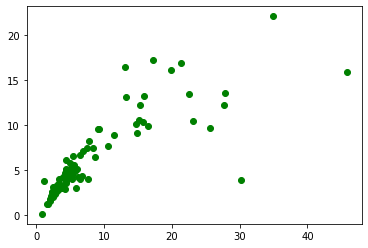

In [44]:
plt.scatter(unemployment['Female Unemployment with Adv Edu'], 
            unemployment['Male Unemployment with Adv Edu'], color= 'green')
plt.show()

In [35]:
bachelor_degree_cum = wb.data.DataFrame(['SE.TER.CUAT.BA.ZS', 'SE.TER.CUAT.BA.MA.ZS', 'SE.TER.CUAT.BA.FE.ZS'],
                  time= 2020, skipBlanks=True, labels=True) 

bachelor_degree_cum.reset_index (drop= True, inplace = True)

bachelor_degree_cum.columns =['Country', 'BA Total', 'BA Female', 'BA Male']

bachelor_degree_cum

# Educational attainment, at least Bachelor's or equivalent for 25+ total, and then male, female (%) cumulative
# blank values are skipped
# until the year 2020

,Country,BA Total,BA Female,BA Male
0,West Bank and Gaza,23.055840,20.384489,21.708691
1,United States,38.320171,36.669022,37.524288
2,United Kingdom,38.787151,35.708431,37.276470
3,Spain,25.549721,21.466290,23.578011
4,Saudi Arabia,32.260860,30.293600,31.051500
5,Portugal,25.421350,19.073839,22.507700
6,Poland,31.162960,24.497040,28.012680
7,Paraguay,16.533060,11.727020,14.185130
8,Oman,22.880930,14.134140,17.096630
9,North Macedonia,22.479830,20.864870,21.675699


In [36]:
bachelor_degree_cum.mean()

/var/folders/_k/l8cjrd3s28xg5ssbhjb___tw0000gn/T/ipykernel_12692/996488038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bachelor_degree_cum.mean()


BA Total     25.341504
BA Female    22.308849
BA Male      23.807908
dtype: float64

In [37]:
#sorting a column in descending order

ba_total = bachelor_degree_cum.sort_values(by='BA Total',ascending=False)
ba_total

,Country,BA Total,BA Female,BA Male
20,Iceland,41.949120,31.649900,36.618309
16,Lithuania,41.393421,34.140461,38.103458
2,United Kingdom,38.787151,35.708431,37.276470
1,United States,38.320171,36.669022,37.524288
35,Australia,38.294300,31.622210,35.023411
25,Denmark,37.948429,28.235291,33.090500
12,Mongolia,37.494431,27.248381,32.604370
10,New Zealand,35.555420,28.849020,32.283272
23,Estonia,34.319149,26.733950,30.846510
11,Netherlands,33.338749,36.256721,34.773628


In [38]:
#sorting a column in descending order

ba_female = bachelor_degree_cum.sort_values(by='BA Female',ascending=False)
ba_female

,Country,BA Total,BA Female,BA Male
1,United States,38.320171,36.669022,37.524288
11,Netherlands,33.338749,36.256721,34.773628
2,United Kingdom,38.787151,35.708431,37.276470
16,Lithuania,41.393421,34.140461,38.103458
20,Iceland,41.949120,31.649900,36.618309
35,Australia,38.294300,31.622210,35.023411
4,Saudi Arabia,32.260860,30.293600,31.051500
27,Curacao,30.820230,29.319370,30.166950
26,Cyprus,30.502171,29.040010,29.795259
10,New Zealand,35.555420,28.849020,32.283272


In [39]:
#sorting a column in descending order

ba_male = bachelor_degree_cum.sort_values(by='BA Male',ascending=False)
ba_male

,Country,BA Total,BA Female,BA Male
16,Lithuania,41.393421,34.140461,38.103458
1,United States,38.320171,36.669022,37.524288
2,United Kingdom,38.787151,35.708431,37.276470
20,Iceland,41.949120,31.649900,36.618309
35,Australia,38.294300,31.622210,35.023411
11,Netherlands,33.338749,36.256721,34.773628
25,Denmark,37.948429,28.235291,33.090500
12,Mongolia,37.494431,27.248381,32.604370
10,New Zealand,35.555420,28.849020,32.283272
4,Saudi Arabia,32.260860,30.293600,31.051500


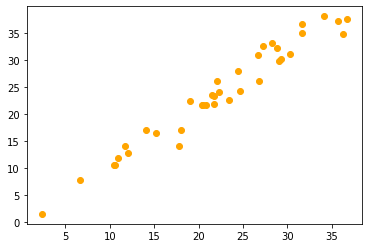

In [40]:
plt.scatter(bachelor_degree_cum['BA Female'], bachelor_degree_cum['BA Male'], color = 'orange')
plt.show()

In [41]:
wb.data.DataFrame(['SE.TER.CUAT.BA.ZS'], 'LTU', 
                  range(2010, 2022), 
                  skipBlanks=True, 
                  labels=True, 
                  columns='series')

# use this code to fetch details about a specific country acc to a range of time.

,Time,SE.TER.CUAT.BA.ZS
time,,
YR2020,2020,38.103458
YR2017,2017,34.539471
YR2016,2016,33.942532
YR2015,2015,33.097351
YR2014,2014,31.495100
YR2013,2013,26.385269


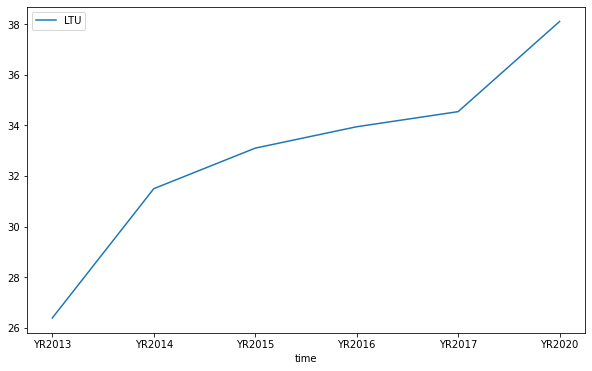

In [42]:
# plotting a data series for total pop with Bachelor's degree Lithuania 🇱🇹 

wb.data.DataFrame('SE.TER.CUAT.BA.ZS', ['LTU'],
                  range(2000, 2022), skipBlanks=True, index='time').plot(figsize=(10, 6))
plt.show()

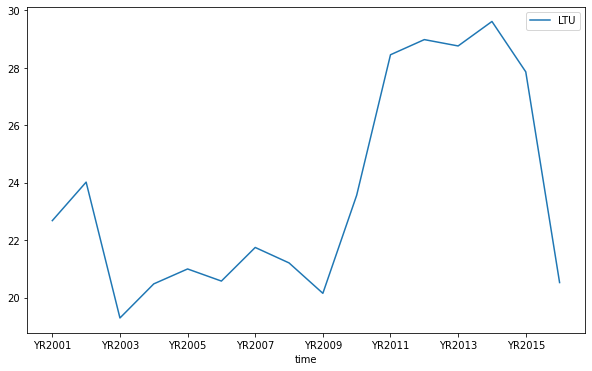

In [45]:
# plotting a data series for Lithuania 🇱🇹 
# SE.XPD.TERT.ZS Expenditure on tertiary education (% of government expenditure on education)

wb.data.DataFrame('SE.XPD.TERT.ZS', ['LTU'],
                  range(2000, 2022), skipBlanks=True, index='time').plot(figsize=(10, 6))
plt.show()

In [46]:
wb.data.DataFrame(['SE.TER.CUAT.BA.ZS'], 'USA', 
                  range(2010, 2022), 
                  skipBlanks=True, 
                  labels=True, 
                  columns='series')

# use this code to fetch details about a specific country acc to a range of time.

,Time,SE.TER.CUAT.BA.ZS
time,,
YR2020,2020,37.524288
YR2018,2018,34.992470
YR2016,2016,33.439690
YR2015,2015,32.500759
YR2014,2014,31.955799
YR2013,2013,31.660660


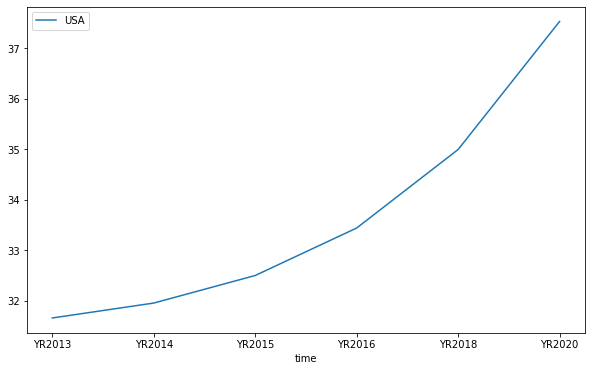

In [47]:
# plotting a data series for BA for the USA 🇺🇸  

wb.data.DataFrame('SE.TER.CUAT.BA.ZS', ['USA'],
                  range(2000, 2022), skipBlanks=True, index='time').plot(figsize=(10, 6))
plt.show()

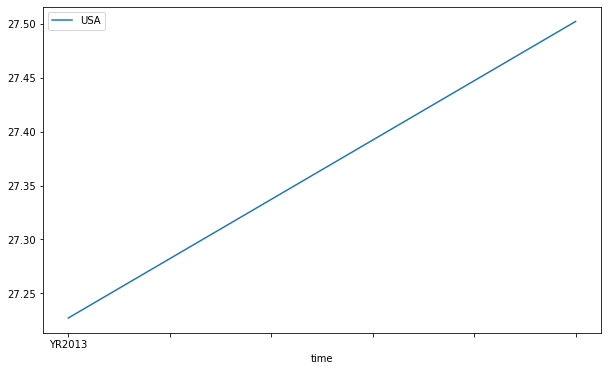

In [49]:
wb.data.DataFrame('SE.XPD.TERT.ZS', ['USA'],
                  range(2000, 2022), skipBlanks=True, index='time').plot(figsize=(10, 6))
plt.show()

<AxesSubplot:>

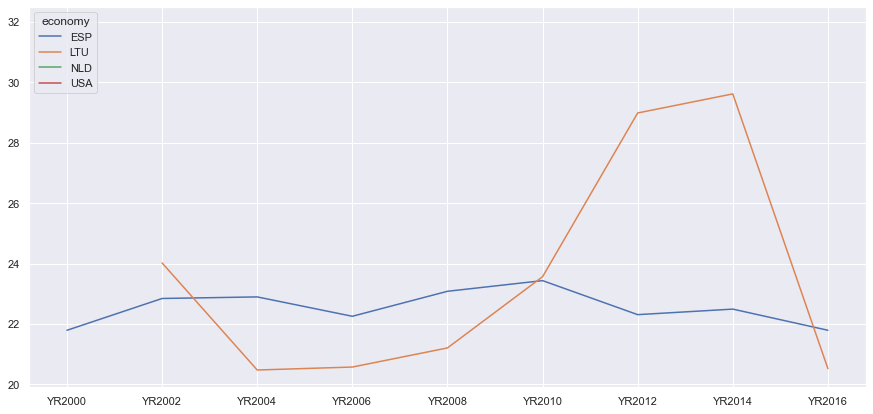

In [95]:
# SE.XPD.TERT.ZS Expenditure on tertiary education (% of government expenditure on education)
wb.data.DataFrame('SE.XPD.TERT.ZS', ['NLD' , 'LTU', 'ESP', 'USA'], time=range(2000, 2020, 2)).T.plot()


In [50]:
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15,7
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="r", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

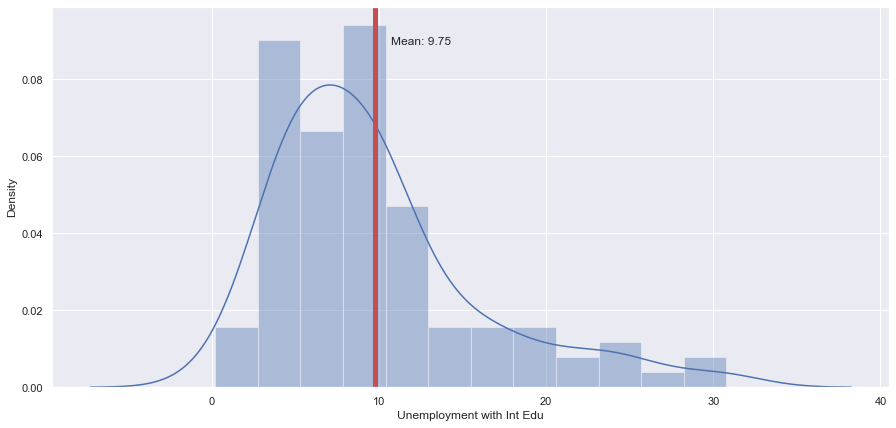

In [56]:
Unemployment_Intermediate_Education = all_countries['Unemployment with Int Edu']
plot_distribution(Unemployment_Intermediate_Education)

In [57]:
Unemployment_Intermediate_Education.describe ()

count    100.000000
mean       9.748753
std        6.253100
min        0.200000
25%        5.229908
50%        8.750000
75%       11.264394
max       30.780001
Name: Unemployment with Int Edu, dtype: float64

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

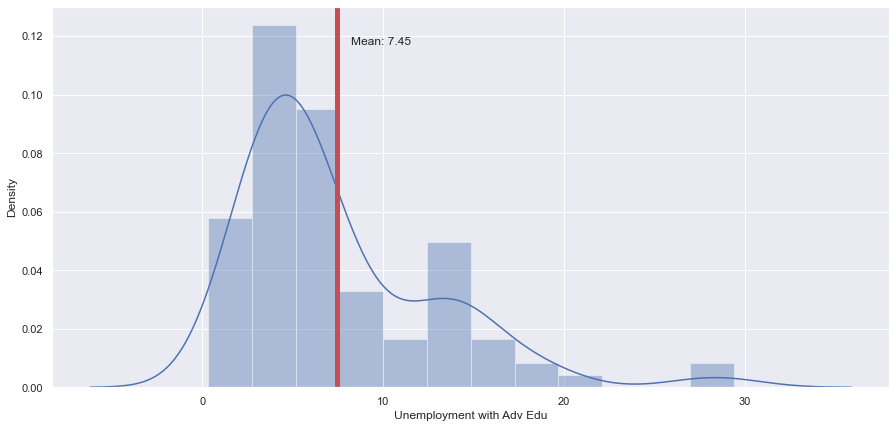

In [58]:
Unemployment_Advanced_Education = all_countries['Unemployment with Adv Edu']
plot_distribution(Unemployment_Advanced_Education)

In [59]:
Unemployment_Advanced_Education.describe ()

count    100.000000
mean       7.453529
std        5.447438
min        0.300000
25%        3.865000
50%        5.560000
75%        9.635000
max       29.379999
Name: Unemployment with Adv Edu, dtype: float64

In [63]:
len(Unemployment_Advanced_Education)

110

In [70]:
Unemployment_Advanced_Education.var ()

29.67458410693741

In [64]:
len(Unemployment_Intermediate_Education)

110

In [71]:
Unemployment_Intermediate_Education.var ()

39.10125763033217

Unemployment with advanced education is a less dispersed dataset than unemployment with intermediate education. 

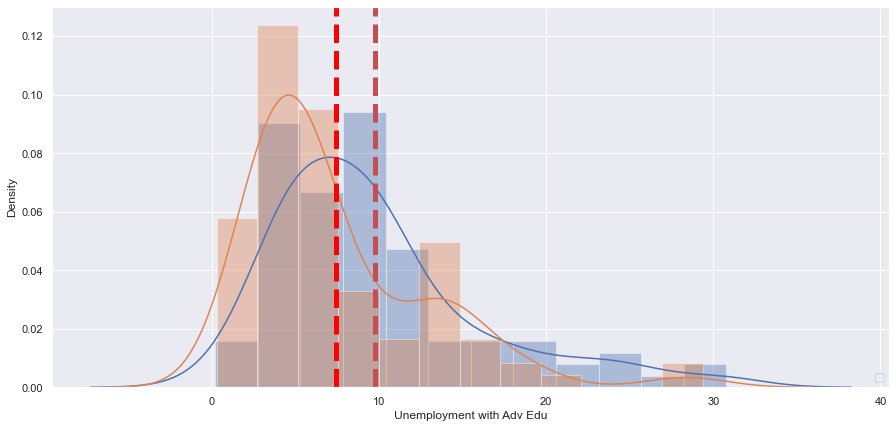

In [103]:

plt.figure()
plt.legend(["blue", "green"], loc ="lower right")
ax1 = sns.distplot(Unemployment_Intermediate_Education)
ax2 = sns.distplot(Unemployment_Advanced_Education)
plt.axvline(np.mean(Unemployment_Intermediate_Education), color='r', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Unemployment_Advanced_Education), color='red', linestyle='dashed', linewidth=5)

#reference: https://github.com/bhattbhavesh91/GA_Sessions/blob/master/t_test_independence/T_Test_Sales.ipynb

In [66]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
#reference: https://github.com/bhattbhavesh91/GA_Sessions/blob/master/t_test_independence/T_Test_Sales.ipynb

In [69]:
sample_size = 100
inter_edu_sampled = np.random.choice(Unemployment_Intermediate_Education, sample_size)
adv_edu_sampled = np.random.choice(Unemployment_Advanced_Education, sample_size)
compare_2_groups(inter_edu_sampled, adv_edu_sampled, 0.05, sample_size)

Statistics=nan, p=nan
Different distributions (reject H0)


So, we reject the null hypothesis. There is a relationship between unemployment with advanced and intermediate education. 

## Main takeaways:
- Unemployment rate is less dispersed with advanced comparared to unemployment with intermediate education.
- 